<a href="https://colab.research.google.com/github/pavan03ds/Feature-Engineering/blob/main/7_Handling_Missing_Values_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arbitrary Value Imputation
This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic.csv', usecols=['Age', 'Fare' ,'Survived'] )

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [ ]:
impute_nan(df,'Age')

In [ ]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


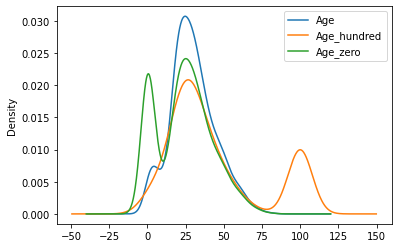

In [ ]:
ax = plt.figure().add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df['Age_hundred'].plot(kind='kde',ax=ax)
df['Age_zero'].plot(kind='kde',ax=ax)
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables)

###Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

###Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

#

#How To Handle Categroical Missing Values
##-Frequent Category Imputation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

we can see that in **BsmtQual** and **GarageType** has less NaN values out of 1460 values( which is very less).
* So ,we fill Na's with most frequent values







In [ ]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#compute the frequency with every feature

In [ ]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

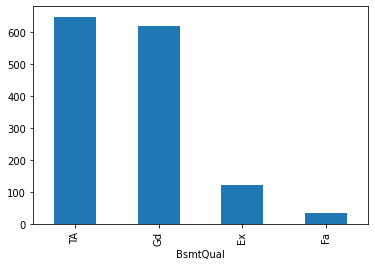

In [ ]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=False).plot.bar()

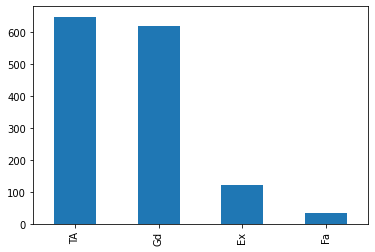

In [ ]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()  #same as the above

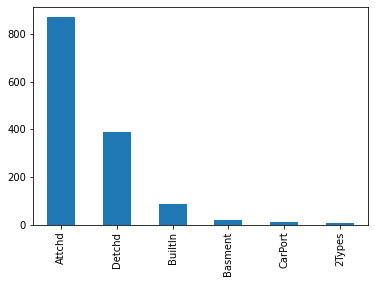

In [ ]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

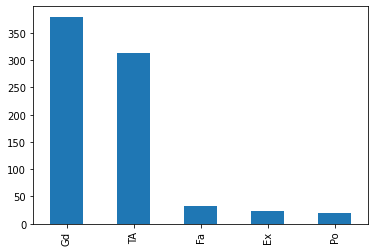

In [ ]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [ ]:
df['BsmtQual'].value_counts().sort_values(ascending=False).index[0]

'TA'

In [ ]:
def impute_nan(df,variable):
  most_frequent = df[variable].value_counts().sort_values(ascending=False).index[0]
  df[variable].fillna(most_frequent,inplace=True)

In [ ]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
  impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()   #we can see that there are no null values

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

##Advantages
1. Easy To implement
2. ater way to implement 

## Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2.It distorts the relation of the most frequent label

#

#Adding a variable to capture NAN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [ ]:
df.isna().sum()

BsmtQual         37
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_var      0
dtype: int64

In [ ]:
most_frequent = df['BsmtQual'].mode()[0]
most_frequent

'TA'

In [ ]:
df['BsmtQual'].fillna(most_frequent,inplace=True)

In [ ]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_var      0
dtype: int64

In [ ]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'],1,0)

In [ ]:
most_frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(most_frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,1
2,Gd,TA,Attchd,223500,0,1
3,TA,Gd,Detchd,140000,0,1
4,Gd,TA,Attchd,250000,0,1


In [ ]:
df.isna().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_var        0
FireplaceQu_var     0
dtype: int64

In [ ]:
df['GarageType_var'] = np.where(df['GarageType'],1,0)

In [ ]:
most_frequent = df['GarageType'].mode()[0]
most_frequent

'Attchd'

In [ ]:
df['GarageType'].fillna(most_frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,1
1,Gd,TA,Attchd,181500,0,1,1
2,Gd,TA,Attchd,223500,0,1,1
3,TA,Gd,Detchd,140000,0,1,1
4,Gd,TA,Attchd,250000,0,1,1


In [ ]:
df.isna().sum()   #we can see that al the null value are filled with most frequent value and capture the value of null values 

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_var       0
FireplaceQu_var    0
GarageType_var     0
dtype: int64

#

##Suppose if you have more frequent categories, we just replace NAN with a new category

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
def impute_nan(df,variable):
  df[variable+'_newvar'] = df[variable]
  df[variable+'_newvar'].fillna('Missing',inplace=True)

Below function also does the same as the above function (i commented it )

In [ ]:
# def impute_nan(df,variable):
#   df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [ ]:
df.isna().sum()

BsmtQual              37
FireplaceQu          690
GarageType            81
SalePrice              0
BsmtQualnewvar         0
FireplaceQunewvar      0
GarageTypenewvar       0
dtype: int64

In [ ]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalePrice          1460 non-null   int64 
 1   BsmtQualnewvar     1460 non-null   object
 2   FireplaceQunewvar  1460 non-null   object
 3   GarageTypenewvar   1460 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [ ]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [ ]:
for feature in ['BsmtQualnewvar',	'FireplaceQunewvar',	'GarageTypenewvar']:
  print(df[feature].value_counts(),'\n')

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQualnewvar, dtype: int64 

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQunewvar, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
Missing     81
Basment     19
CarPort      9
2Types       6
Name: GarageTypenewvar, dtype: int64 

